In [ ]:
#!sudo apt install espeak
#!pip install pyttsx3
!unzip /content/drive/MyDrive/desk/archive.zip 

In [7]:
import os
import cv2
import pyttsx3
import tensorflow_hub as hub
import numpy as np
from tensorflow import one_hot
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Sequential
from matplotlib import pyplot as plt
from keras.models import load_model


In [16]:
folder = "/content/original_images"
nsp = 400
img_size = (100,100)
classes = os.listdir(folder)

In [17]:
#creating the dataset for training
def make_set(classes, size):
  arr = []
  size = (size, size)
  for i in classes:
    fpath = os.path.join(folder, i)
    img_names = os.listdir(fpath)
    for img_name in img_names[:nsp]:
      try:
        full_path = os.path.join(fpath, img_name)
        img_data = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
        img_resied = cv2.resize(img_data, size)
        arr.append([img_resied, classes.index(i)])
        print(".", end = '')
      except:
        pass
  return arr

dset = make_set(classes,100)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [19]:
#data set editing
def spli(data, img_size, onehot = 0):
  x = []
  y = []
  for i in data:
    x.append(i[0])
    y.append(i[1])
  x = np.array(x)
  x = x/255.0
  x = x.reshape(-1,img_size,img_size,1)
  if onehot:
    y = one_hot(y, len(classes))

  return x,y

In [20]:
#splitting test and training data
x,y = spli(dset, img_size = 100, onehot = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
y_test = one_hot(y_test, len(classes))
y_train = one_hot(y_train, len(classes))

In [21]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(MaxPooling2D(3,3))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(3,3))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(3,3))
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(len(classes)))
model.add(Activation("sigmoid"))

model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer="adam")
training = model.fit(X_train, y_train, epochs = 15)
model.save("modelfile.h5")

Epoch 1/15
302/302 [==============================] - 124s 408ms/step - loss: 3.1405 - accuracy: 0.1405
Epoch 2/15
302/302 [==============================] - 126s 416ms/step - loss: 1.0485 - accuracy: 0.6970
Epoch 3/15
302/302 [==============================] - 123s 406ms/step - loss: 0.4575 - accuracy: 0.8671
Epoch 4/15
302/302 [==============================] - 127s 419ms/step - loss: 0.2639 - accuracy: 0.9228
Epoch 5/15
302/302 [==============================] - 122s 405ms/step - loss: 0.1698 - accuracy: 0.9484
Epoch 6/15
302/302 [==============================] - 124s 410ms/step - loss: 0.1280 - accuracy: 0.9627
Epoch 7/15
302/302 [==============================] - 121s 401ms/step - loss: 0.0940 - accuracy: 0.9708
Epoch 8/15
302/302 [==============================] - 123s 408ms/step - loss: 0.0531 - accuracy: 0.9838
Epoch 9/15
302/302 [==============================] - 121s 401ms/step - loss: 0.0505 - accuracy: 0.9862
Epoch 10/15
302/302 [==============================] - 123s 408m

149/149 [==============================] - 16s 103ms/step - loss: 0.1331 - accuracy: 0.9691


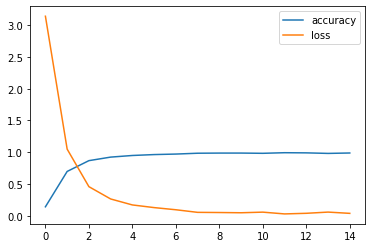

In [22]:
#evaluating the model
model.evaluate(X_test, y_test)
#plotting the accuracy and loss
plt.plot(training.history['accuracy'], label = 'accuracy')
plt.plot(training.history['loss'], label = 'loss')
plt.legend()
plt.show()

In [39]:
#prediction
def classi(test_path):
  model = load_model("/content/modelfile.h5")
  cand = cv2.imread(test_path,cv2.IMREAD_GRAYSCALE)
  candrs = cv2.resize(cand, (100,100))
  candrshp = candrs.reshape(-1, 100, 100, 1)
  res = model.predict(candrshp)
  engine = pyttsx3.init()
  engine.say(classes[np.argmax(res)])
  print(classes[np.argmax(res)])
  engine.runAndWait()

classi("/content/original_images/9/100.jpg")


1/1 [==============================] - 0s 82ms/step
9
